In [2]:
import pandas as pd
import numpy as np
import os
import json
import re 
import sys
import itertools
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors




In [3]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)


/home/monisha_111/Spotify/Spotify-Recommendation-System/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/monisha_111/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1


In [4]:
# Path to the dataset
dataset_path = "/home/monisha_111/.cache/kagglehub/datasets/maharshipandya/-spotify-tracks-dataset/versions/1"


# Load the dataset
df = pd.read_csv(os.path.join(dataset_path, "dataset.csv"))

# Show the first few rows
display(df.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [26]:
# Drop rows where 'artists', 'album_name', or 'track_name' is missing
df = df.dropna(subset=['artists', 'album_name', 'track_name'])
display(df.isnull().sum())

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [27]:
display(df.describe())
df.dtypes

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

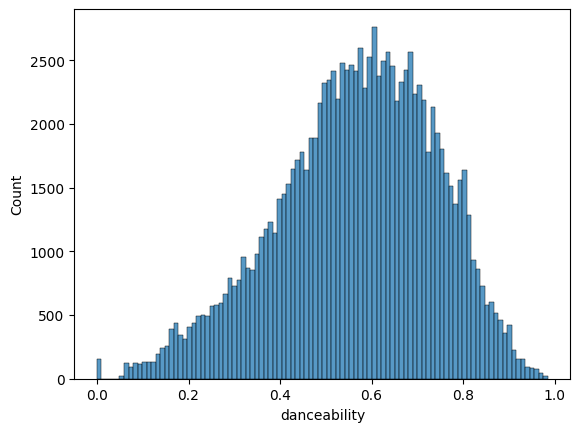

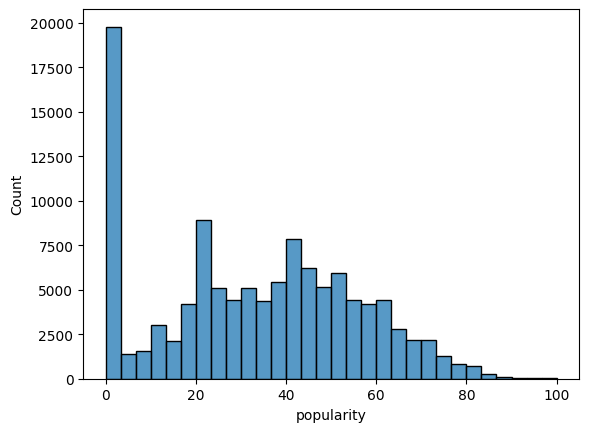

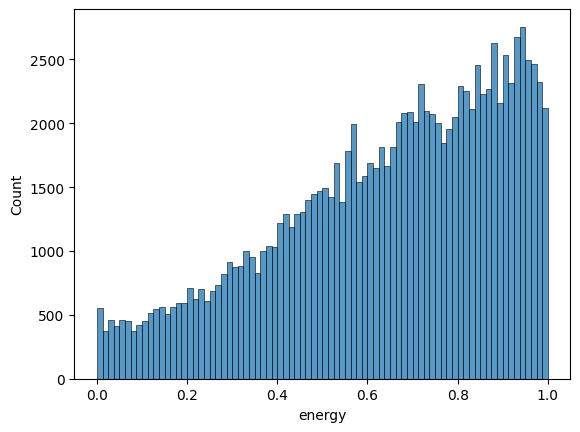

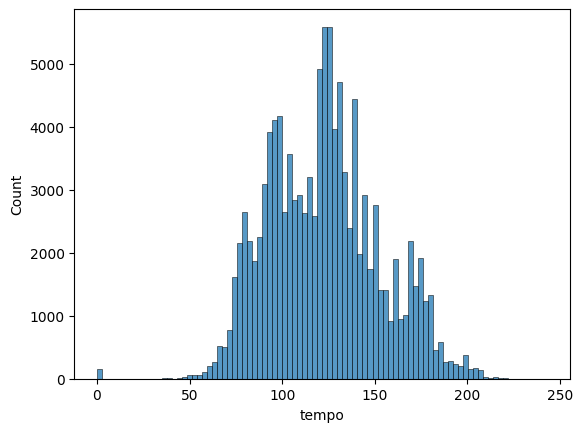

In [28]:
# Example: danceability, popularity, energy, tempo
sns.histplot(df['danceability'], bins=100)
plt.show()

sns.histplot(df['popularity'], bins=30)
plt.show()

sns.histplot(df['energy'], bins=80)
plt.show()

sns.histplot(df['tempo'], bins=90)
plt.show()

In [29]:
display(df['track_genre'].unique())


array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Part 2: 

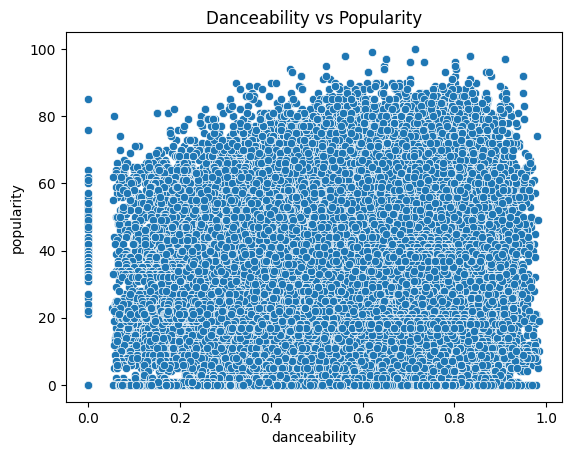

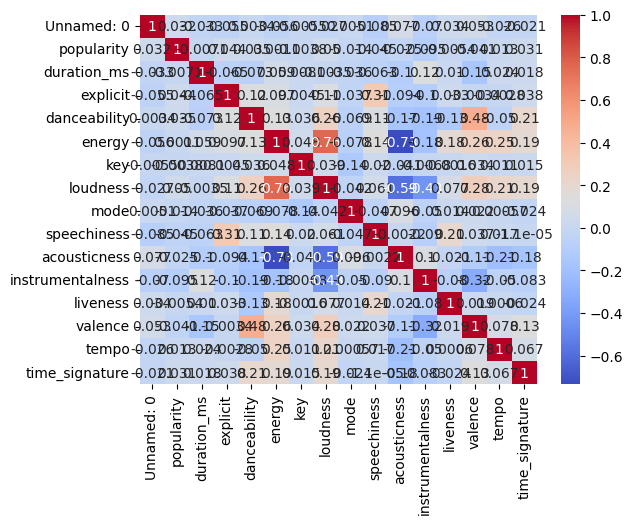

In [31]:
# Example: audio features vs popularity
sns.scatterplot(data=df, x='danceability', y='popularity')
plt.title('Danceability vs Popularity')
plt.show()

# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [5]:
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
df[features] = StandardScaler().fit_transform(df[features])
display(df.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.629244,-0.717148,...,0.300828,0,0.551848,-0.850202,-0.504109,0.758743,0.929306,-1.141863,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,-0.845908,-1.889980,...,-1.784744,1,-0.078993,1.831732,-0.504094,-0.591211,-0.798690,-1.489717,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,-0.742186,-1.122669,...,-0.293288,1,-0.273826,-0.315499,-0.504112,-0.507167,-1.365688,-1.528312,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,-1.733304,-2.312994,...,-2.039252,1,-0.457309,1.774593,-0.503883,-0.428376,-1.276974,1.987859,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.295030,-0.788711,...,-0.282750,1,-0.303145,0.463399,-0.504112,-0.686285,-1.184403,-0.073348,4,acoustic


In [9]:
X = df[features]
y = df['popularity']
LRmodel = LinearRegression().fit(X, y)
new_song = [[0.6, 0.7, -5.3, 0.3, 0.0, 0.2, 0.1, 0.4, 120.0]]
new_song_df = pd.DataFrame(new_song, columns=features)
predicted_popularity = LRmodel.predict(new_song_df)
print(predicted_popularity)

[62.00057718]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

model = NearestNeighbors(n_neighbors=6, metric='cosine')  # 6 to exclude the query itself
model.fit(X_scaled)

def recommend_songs_with_notes_by_name(song_names, df, model, scaler, features, n_recs=5):
    # Normalize input song names
    song_names_cleaned = [s.lower().strip() for s in song_names]

    # Get rows that match track_name
    input_songs = df[df['track_name'].str.lower().isin(song_names_cleaned)]

    if input_songs.empty:
        return "No matching songs found in dataset."

    input_features_scaled = scaler.transform(input_songs[features])
    mean_vector = input_features_scaled.mean(axis=0).reshape(1, -1)

    # Find more neighbors to account for duplicates
    distances, indices = model.kneighbors(mean_vector, n_neighbors=25)
    
    recommendations_raw = df.iloc[indices[0]].copy()

    # Remove input songs and drop duplicates by track_id
    recommendations_filtered = recommendations_raw[
        ~recommendations_raw['track_name'].str.lower().isin(song_names_cleaned)
    ].drop_duplicates(subset='track_id')

    # Keep only the top n unique recommendations
    recommendations = recommendations_filtered.head(n_recs)

    notes = []
    for _, song in recommendations.iterrows():
        song_features_scaled = scaler.transform([song[features].values])
        diff = np.abs(song_features_scaled - mean_vector).flatten()
        top_indices = diff.argsort()[:3]
        top_features = [features[i] for i in top_indices]
        note = f"Similar in {', '.join(top_features)}."
        notes.append(note)

    recommendations = recommendations[['track_name', 'artists', 'track_id']].copy()
    recommendations["reason"] = notes

    return recommendations

results = recommend_songs_with_notes_by_name(
    ['To Begin Again'], 
    df, model, scaler, features, n_recs=5
)
display(results)
df[df['track_name'] == 'To Begin Again']

/home/monisha_111/Spotify/Spotify-Recommendation-System/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/monisha_111/Spotify/Spotify-Recommendation-System/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/monisha_111/Spotify/Spotify-Recommendation-System/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/monisha_111/Spotify/Spotify-Recommendation-System/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/monisha_111/Spotify/Spotify-Recomm

,track_name,artists,track_id,reason
17605,Infatuation,SOPHIE,68RqzBNbrTlT5RPygZM4BM,"Similar in liveness, acousticness, tempo."
94163,Feel Again (Feat. Au/Ra),Kina;Au/Ra,1fgC2MHbJnPgvDfdTpC62c,"Similar in instrumentalness, speechiness, live..."
113365,How Great Is Your Love,Phil Wickham,3lqLz5HJ7JFMcOKMNIH3Uo,"Similar in instrumentalness, danceability, lou..."
36032,Tourner Dans Le Vide - Version Orchestrale,Indila,4wOF4JSNrLRjWNPCYahZn1,"Similar in instrumentalness, energy, acousticn..."
36018,Tourner Dans Le Vide - Version Orchestrale,Indila,3zlZM4O9Xzfm9T6bGuKTwf,"Similar in instrumentalness, energy, acousticn..."


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17605,17605,68RqzBNbrTlT5RPygZM4BM,SOPHIE,OIL OF EVERY PEARL'S UN-INSIDES,Infatuation,38,280286,False,-1.220458,-1.218086,...,-0.428496,0,-0.462983,-0.360609,-0.436918,-0.480903,-1.676187,-1.588323,4,club


In [9]:
df[df['track_name'] == 'Infatuation']

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
17605,17605,68RqzBNbrTlT5RPygZM4BM,SOPHIE,OIL OF EVERY PEARL'S UN-INSIDES,Infatuation,38,280286,False,-1.220458,-1.218086,...,-0.428496,0,-0.462983,-0.360609,-0.436918,-0.480903,-1.676187,-1.588323,4,club
